<a href="https://colab.research.google.com/github/NaHyeon1Kim/Modeling/blob/main/Structual_Equation_Model_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*무인 키오스크 모형의 예

* structural part
 - $\eta_1$ ~ $\xi_1$ + $\xi_2$

* measurement part
 - $\eta_1$ =~ $y_1$ + $y_2$
 - $\xi_1$ =~ $x_1$ + $x_2$
 - $\xi_2$ =~ $x_3$ + $x_4$

In [ ]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 11.5 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.10-py3-none-any.whl size=1659680 sha256=4daa6128608289c0c616c9a31447e39949cf8476feac38d31502b62902a31fd0
  Stored in directory: /root/.cache/pip/wheels/c2/8e/7f/4299ddd66512f11df668a853e9e0814c05da708ebdedb9544f
Successfully built semopy


In [ ]:
import semopy
import pandas as pd

'# measurement model\nind60 =~ x1 + x2 + x3\ndem60 =~ y1 + y2 + y3 + y4\ndem65 =~ y5 + y6 + y7 + y8\n# regressions\ndem60 ~ ind60\ndem65 ~ ind60 + dem60\n# residual correlations\ny1 ~~ y5\ny2 ~~ y4 + y6\ny3 ~~ y7\ny4 ~~ y8\ny6 ~~ y8'

In [ ]:
#desc = '#measurement model \n eta1 =~ x1 + x2 \n eta2 =~ x3 + x4 \n xi1 =~ y1 + y2 \n # regressions \n xi1 ~ eta1 + eta2 # residual correlations \n y1 ~~ y2 \n x1 ~~ x2 \n x3 ~~ x4'
desc = '#measurement model \n eta1 =~ x1 + x2 \n eta2 =~ x3 + x4 \n xi1 =~ y1 + y2 \n # regressions \n xi1 ~ eta1 + eta2'
desc = '''
#measurement model
eta1 =~ x1 + x2
eta2 =~ x3 + x4
xi1 =~ y1 + y2

# regressions
xi1 ~ eta1 + eta2
'''
print( desc )


#measurement model
eta1 =~ x1 + x2
eta2 =~ x3 + x4
xi1 =~ y1 + y2

# regressions
xi1 ~ eta1 + eta2



In [ ]:
data = semopy.examples.political_democracy.get_data()
data = pd.read_csv("data.csv")

In [ ]:
mod = semopy.Model(desc)
res = mod.fit(data)
print(res)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 4.543
Number of iterations: 52
Params: -2.527 -0.379 -1.255 -0.257 1.003 0.313 0.395 1.361 2.644 0.000 0.000 0.445 0.085 1.933 0.000


In [ ]:
ins = mod.inspect()
print(ins)

    lval  op  rval      Estimate  Std. Err   z-value   p-value
0    xi1   ~  eta1 -2.571046e-01  0.431269 -0.596159  0.551069
1    xi1   ~  eta2  1.002585e+00  0.471245  2.127526  0.033376
2     x1   ~  eta1  1.000000e+00         -         -         -
3     x2   ~  eta1 -2.527374e+00  3.461063 -0.730231  0.465249
4     x3   ~  eta2  1.000000e+00         -         -         -
5     x4   ~  eta2 -3.790210e-01  0.186139 -2.036221  0.041728
6     y1   ~   xi1  1.000000e+00         -         -         -
7     y2   ~   xi1 -1.255227e+00  0.506959 -2.475994  0.013287
8   eta1  ~~  eta1  3.130960e-01   0.67218  0.465792  0.641364
9   eta1  ~~  eta2  3.945021e-01  0.591627  0.666809  0.504894
10  eta2  ~~  eta2  1.360506e+00  0.628847  2.163492  0.030503
11   xi1  ~~   xi1  8.492937e-02   0.21211  0.400402  0.688861
12    x1  ~~    x1  2.644364e+00  1.224572  2.159419  0.030818
13    x2  ~~    x2  0.000000e+00  2.030458       0.0       1.0
14    x3  ~~    x3  4.333896e-15  0.158913       0.0   

- 잠재변수와 첫 관측변수 사이의 계수는 1로 고정
- a \~~ b + c 는 a와 b, a와 c 사이의 공분산 지정
- c \~~ c는 분산 지


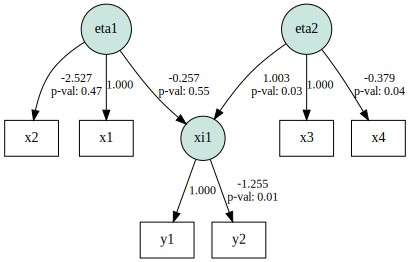

In [ ]:
g = semopy.semplot(mod, "pathdiagram.png")
g